# <center> NYC Service Calls Analysis
<center> Author: Jeremy Kight
<center> Date: 01/19/2020    

# Introduction

In 2009, all of the 311 service calls that took place in New York City, New York were collected and stored in a dataframe. Analyzing service calls can be quite beneficial for city officials because it reveals the pressing needs or concerns of the residents. For example, service calls may include heating/air conditioning issues or traffic light problems. The objective of this analysis will be to find out the top ten complaints the residents of New York City called in and reported. This report will also try to find any trends regarding the location where each call took place. All analysis was performed using Python within Jupyter Notebook. 

# Procedure


While it is not necessary to use Jupyter Notebook to perform this analysis, it does provide a clean way to organize and run the required code. Now, there are several ways to get access to Jupyter Notebook and if needed, there are numerous tutorials, blogs, and videos online to help. However, it is recommened to download Anaconda in order to gain easy access to everything needed for data analysis. Below, the steps to perform the data analysis on 311 service calls that took place in NYC are listed out. All related files to this project can be found on github [here](https://github.com/jekight/NYC_Service_Calls).

Step 1) Import the required libraries (pandas & matplotlib)
  
Step 2) Set pandas dataframe display parameters in order to make viewing more asthetically pleasing  
  
Step 3) Import the dataset (make sure the csv file is in the same directory)  
  
Step 4) Start exploring the dataset by utilizing head( )
  
Step 5) Use value_count( ) to discover the top ten complaint types 
  
Step 6) Visual the results using a bar graph
  

# Analysis

To get started, begin by importing the required libraries needed for this analysis. This will include pandas and matplotlib. Pandas is a computer software library written for Python, which provides data structures and data analysis tools. In this case, pandas will be used for data exploration and manipulation. Matplotlib is another library written for Python and it's purpose is to provide high quality plots for data visualization. 



In [19]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



The next step is optional, but is does make viewing the data tables more appealling. Set the dataframe display parameters to control the display width and number of columns shown in the table. Then, set the plotting parameters to dictate the size of the plots. 

In [20]:
#set pandas dataframe display parameters
pd.set_option('display.width',5000)
pd.set_option('display.max_columns',60)
#set plot size for better viewing within the notebook
plt.rcParams['figure.figsize']=(15,7)

Now it is time to load in the dataset. Make sure the csv file is saved in the same working directory as the python script. Again, the dataset can be found [here](https://github.com/jekight/NYC_Service_Calls). Once the dataset is loaded in, the data can start to be explored. The first thing that should be done is to run the head( ) function to get an idea of data table. The head( ) function will give a table as the output which shows the first five rows of the data table.

In [10]:
#import the 311 NYC service request dataset
complaints = pd.read_csv("311_Service_Requests_for_2009.csv", low_memory=False)

In [11]:
#view top 5 records
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,12822544,01/01/2009 12:00:00 AM,01/07/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11225,55 WINTHROP STREET,WINTHROP STREET,FLATBUSH AVENUE,BEDFORD AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,01/07/2009 12:00:00 AM,0 Unspecified,Unspecified,995885.0,178504.0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656621,-73.958066,"(40.65662129596871, -73.95806621423951)"
1,12818524,01/01/2009 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Smoking,Smoking Violation,Restaurant/Bar/Deli/Bakery,11102,29-35 NEWTOWN AVENUE,NEWTOWN AVENUE,29 STREET,30 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,NaN,Pending,02/07/2009 12:00:00 AM,01/02/2009 12:00:00 AM,01 QUEENS,QUEENS,1005906.0,219416.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.768896,-73.921818,"(40.76889608950418, -73.92181786912313)"
2,12823061,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11220,NaN,NaN,NaN,NaN,6 AVENUE,GOWANUS EXPRESSWAY,INTERSECTION,BROOKLYN,NaN,NaN,Closed,NaN,01/01/2009 12:00:00 AM,10 BROOKLYN,BROOKLYN,979581.0,170750.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.635345,-74.016822,"(40.635344653337626, -74.01682221017914)"
3,12823062,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11201,NaN,NaN,NaN,NaN,GOLD STREET,NASSAU STREET,INTERSECTION,BROOKLYN,NaN,NaN,Closed,NaN,01/01/2009 12:00:00 AM,02 BROOKLYN,BROOKLYN,988950.0,193715.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.698378,-73.983050,"(40.698378448801606, -73.98305008771115)"
4,12823063,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11235,NaN,NaN,NaN,NaN,AVENUE X,OCEAN AVENUE,INTERSECTION,BROOKLYN,NaN,NaN,Closed,NaN,01/01/2009 12:00:00 AM,15 BROOKLYN,BROOKLYN,998094.0,155236.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.592752,-73.950152,"(40.59275234651692, -73.95015246435702)"


Seeing all the variables, along with a small sample of the observations has many benefits. One benefit is that it allows the viewer to determine which variables are important for analysis. Since the objective of this report is to determine the top five complaints in NYC in the year 2009, one of the most important variables has to be complaint type. Below, a slicing technique is used in order to create a subset of the data in which only the complaint type is shown. Applying slicing techniques to data is benefical because it narrows in on the important variables.

In [12]:
#view first 5 complaint type using slicing technique
complaints['Complaint Type'][:5]

0                     HEATING
1                     Smoking
2    Traffic Signal Condition
3    Traffic Signal Condition
4    Traffic Signal Condition
Name: Complaint Type, dtype: object

However, it may also be important to show where the complaints are happening. This can be easily accomplished by adjusting the code above to include 'City' as a variable used in slicing. Also, instead of only viewing the first five recorded complaints, all the observations can be viewed. Notice that the result of the code below is shortened. This is due to having 1783133 rows of data. Thus, for viewing purposes, only viewing the first 10 rows of data will suffice.

In [21]:
#view complaint type and city together
complaints[['Complaint Type','City']]

,Complaint Type,City
0,HEATING,BROOKLYN
1,Smoking,ASTORIA
2,Traffic Signal Condition,BROOKLYN
3,Traffic Signal Condition,BROOKLYN
4,Traffic Signal Condition,BROOKLYN
...,...,...
1783128,GENERAL CONSTRUCTION,BROOKLYN
1783129,APPLIANCE,BRONX
1783130,APPLIANCE,NEW YORK
1783131,Animal in a Park,NEW YORK


In [14]:
#view first 10 complaint type along with city
complaints[['Complaint Type','City']][0:10]

,Complaint Type,City
0,HEATING,BROOKLYN
1,Smoking,ASTORIA
2,Traffic Signal Condition,BROOKLYN
3,Traffic Signal Condition,BROOKLYN
4,Traffic Signal Condition,BROOKLYN
5,HEATING,OZONE PARK
6,NONCONST,BROOKLYN
7,HEATING,BROOKLYN
8,HEATING,WOODSIDE
9,HEATING,NEW YORK


Again, the objective of this report was to determine the top ten complaint types in NYC in the year 2009. The answer to this question lies within the variable 'Complaint Type'. More specifically, the answer will be which observation withing the variable 'Complaint Type' appears the most. This can be found by applying value_counts( ) to the variable 'Complaint Type'. The value_count( ) function will tally how many times a observation repeats itself within the interested column. It will also reveal how many different types of complaints there were. 

In [15]:
#view the data most complaint type
complaints['Complaint Type'].value_counts()

HEATING                              238995
Street Light Condition               130242
GENERAL CONSTRUCTION                 121048
PLUMBING                             104931
Street Condition                     102150
                                      ...  
Radioactive Material                     11
Transportation Provider Complaint         9
Squeegee                                  8
Forensic Engineering                      6
Trapping Pigeon                           1
Name: Complaint Type, Length: 153, dtype: int64

The results show that heating was the number one complaint in NYC, followed by street light condition and general construction. Also, it was revealed that there were 153 different complaints recorded. While the output above is certainly helpful, it does not exactly answer the main question. To take the data transformation a step further, create a new variable that will contain the number of complaints as the observations. This new variable will be called 'complaint_count' and will also be used when plotting. Once the new variable is created, the top ten complaint types can be viewed.

In [16]:
#create Complaint type count object to visualize complaint type data
complaint_count = complaints['Complaint Type'].value_counts()

In [17]:
#view top 10 complaint types
complaint_count[0:10]

HEATING                          238995
Street Light Condition           130242
GENERAL CONSTRUCTION             121048
PLUMBING                         104931
Street Condition                 102150
PAINT - PLASTER                   84324
NONCONST                          67325
Water System                      62991
General Construction/Plumbing     61288
Traffic Signal Condition          60995
Name: Complaint Type, dtype: int64

# Data Visualization

The objective as accomplished, as the top ten complaint types were identified. However, to present the results in a more appealing way, a bar graph can be utilized. Again, the new variable 'complaint_count' will be used to show the number of complaints for the various types. Only the top ten complaints will be shown in the graph.

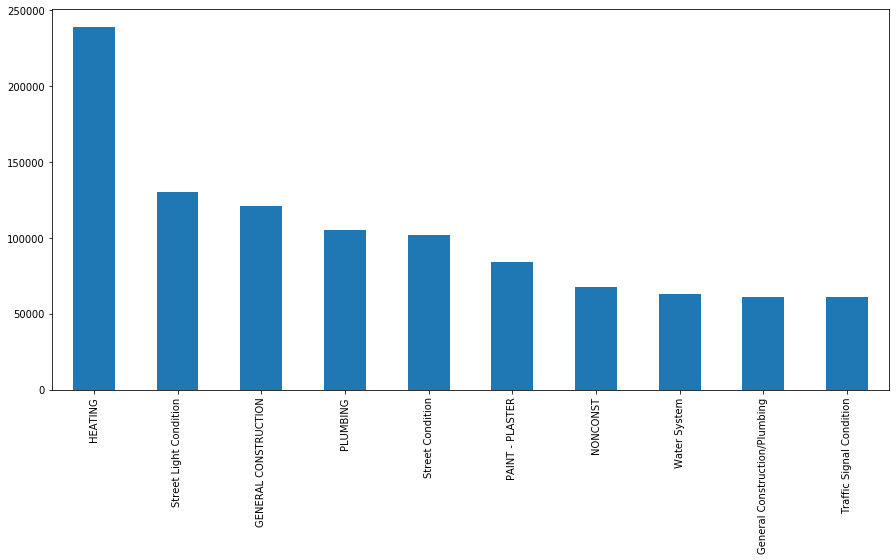

In [18]:
#plot the top 10 complaint types
complaint_count[0:10].plot(kind='bar')

# Results

Using data collected by the city of New York, this analysis found the top ten 311 service calls, with heating being the number one complaint residents called about. Performing data analysis on data such as this is important because it provides city officals with intel on how to better serve their citizens. For example, heating seems to be a pressing need among the residents that needs to be address. With this information, city officials will know how to please the most individuals. By allocating more funds to new heaters or heating repairs, the number of complaints regarding heating should dissipate, thus satisfying the most people. However, this analysis can be taken a step further by visualizing where most of the complaints take place. This would ensure that changes are not happening where there are not problems to begin with. Each city has a specific budget and would not be able to afford to correct everything at once. Thus, it would be imperative that every action has the maximum impact. 